In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# sns.set_theme('notebook')

In [4]:
import pandas as pd

In [5]:
no_buffer = pd.read_csv('./buffer_results/happo_test_running_no_buffer.csv')
buffer_100 = pd.read_csv('./buffer_results/buffer_100.csv')

In [6]:
no_buffer.head()

,Wall time,Step,Value
0,1.757713e+09,800000,-14.616810
1,1.757713e+09,3200000,-136.870392
2,1.757713e+09,4000000,-171.666931
3,1.757713e+09,8800000,-137.530884
4,1.757713e+09,9600000,-128.882538


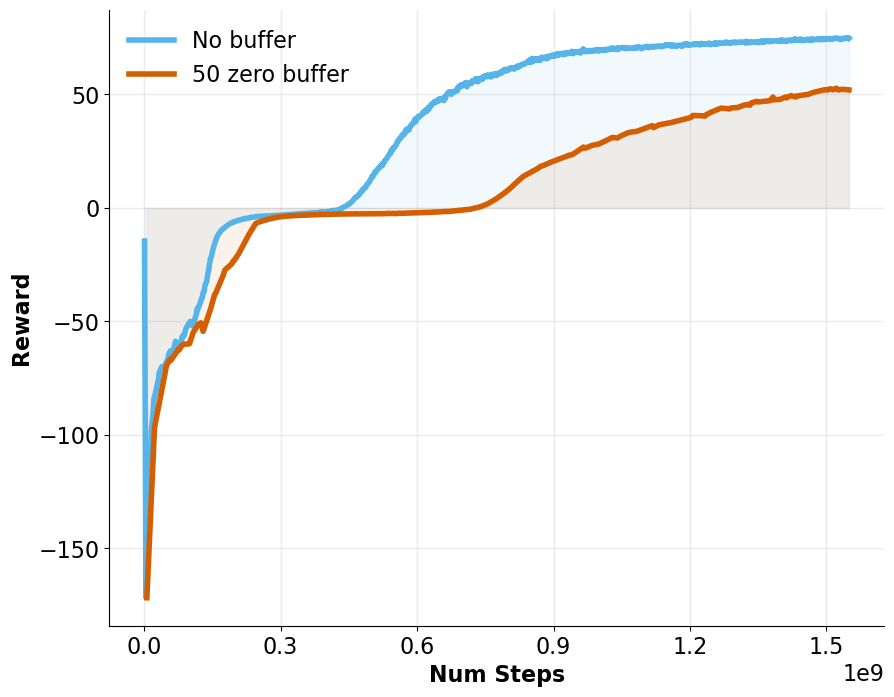

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Use the same palette as before
PALETTE = {
    "blue":   "#0072B2",
    "orange": "#E69F00",
    "green":  "#009E73",
    "sky":    "#56B4E9",
    "red":    "#D55E00",
    "pink":   "#CC79A7",
    "yellow": "#F0E442",
    "black":  "#000000",
}

def _beautify_axes(ax):
    ax.grid(True, alpha=0.25, linewidth=1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))


# ----------------
# Styled buffer plot
# ----------------
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(10, 8))

# Plot "No buffer"
ax.plot(no_buffer['Step'], no_buffer['Value'],
        lw=4, label="No buffer", color=PALETTE["sky"])
ax.fill_between(no_buffer['Step'], no_buffer['Value'], 
                alpha=0.08, color=PALETTE["sky"])

# Plot "50 zero buffer"
ax.plot(buffer_100['Step'][:171], buffer_100['Value'][:171],
        lw=4, label="50 zero buffer", color=PALETTE["red"])
ax.fill_between(buffer_100['Step'][:171], buffer_100['Value'][:171], 
                alpha=0.08, color=PALETTE["red"])

# Labels and legend
ax.set_xlabel("Num Steps", fontweight="bold")
ax.set_ylabel("Reward", fontweight="bold")
ax.legend(frameon=False)

# Beautify
_beautify_axes(ax)

plt.show()


In [ ]:
no_buffer['Value']

0      -14.616810
1     -136.870392
2     -171.666931
3     -137.530884
4     -128.882538
          ...    
995     74.840103
996     74.813568
997     74.622429
998     74.977631
999     74.805115
Name: Value, Length: 1000, dtype: float64

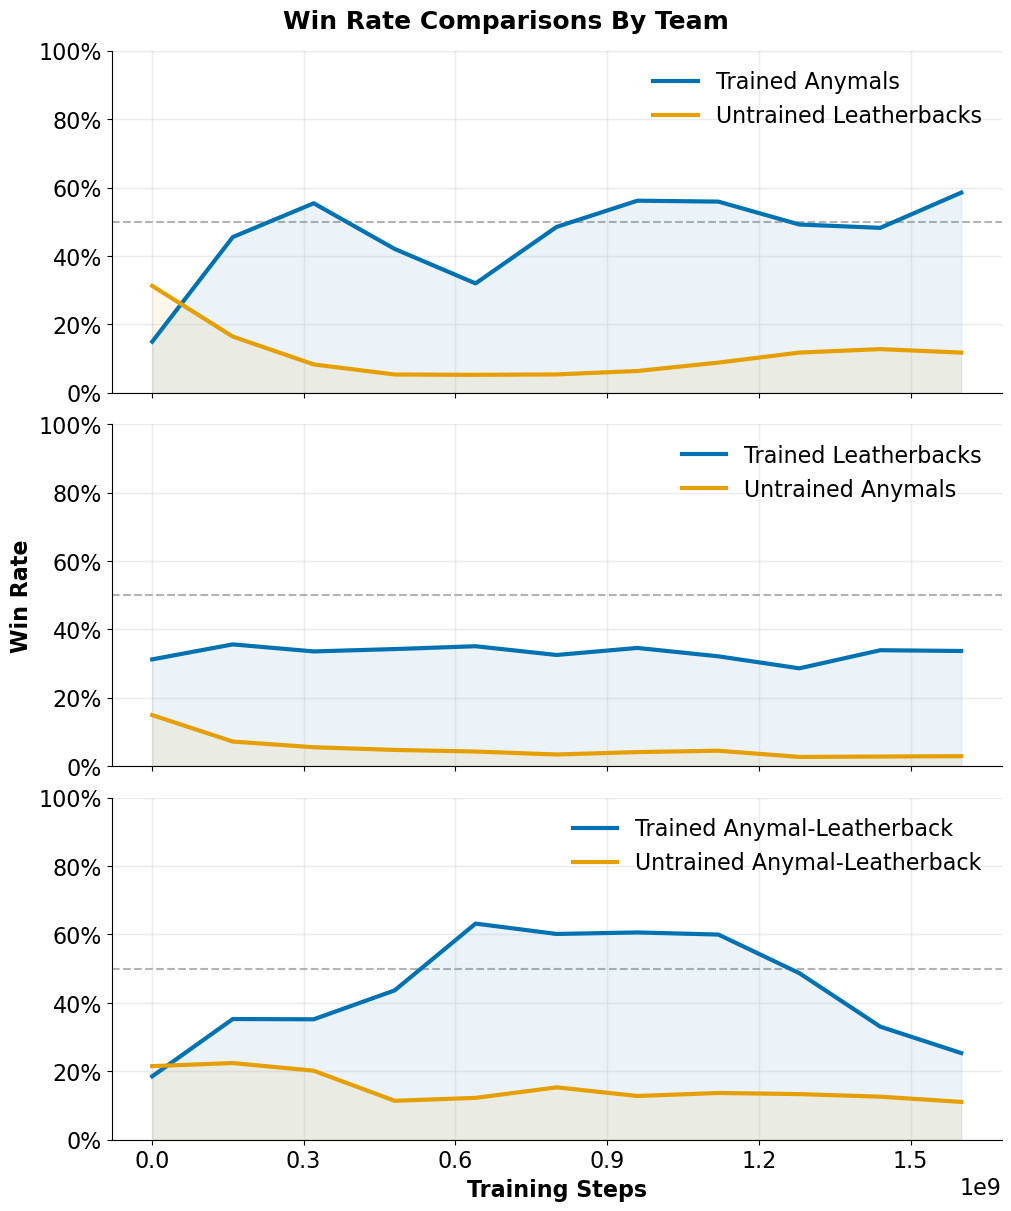

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, MaxNLocator

# Okabe–Ito colorblind-friendly palette
PALETTE = {
    "blue":   "#0072B2",
    "orange": "#E69F00",
    "green":  "#009E73",
    "sky":    "#56B4E9",
    "red":    "#D55E00",
    "pink":   "#CC79A7",
    "yellow": "#F0E442",
    "black":  "#000000",
}

def _beautify_axes(ax):
    ax.grid(True, alpha=0.25, linewidth=1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

def _maybe_percent_axis(ax, *series_list):
    data = np.concatenate([np.asarray(s, dtype=float) for s in series_list if len(s) > 0])
    if data.size == 0 or not np.isfinite(data).any():
        return
    ymax = np.nanmax(data)
    if ymax <= 1.5:  # values like 0–1
        ax.set_ylim(0, 1.0)
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
        ax.axhline(0.5, color="0.7", linewidth=1.5, linestyle="--", zorder=0)
    elif ymax <= 100.0:  # values like 0–100
        ax.set_ylim(0, 100.0)
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=100.0))
        ax.axhline(50, color="0.7", linewidth=1.5, linestyle="--", zorder=0)

def plot_win_rate_grid(vs_data_list, exp_labels, line_labels, title=None):
    fig, axes = plt.subplots(3, 1, figsize=(10, 12),
                             constrained_layout=True,
                             sharex=True, sharey=True)

    for i, (vs_data, label) in enumerate(zip(vs_data_list, exp_labels)):
        ax = axes[i]
        x = vs_data["num_steps"][:11]
        y0 = vs_data["team0_win_percentage"][:11]
        y1 = vs_data["team1_win_percentage"][:11]

        if label =='Trained Leatherbacks vs Untrained Anymals':
            y0 = vs_data["team1_win_percentage"][:11]
            y1 = vs_data["team0_win_percentage"][:11]

        ax.plot(x, y0, lw=3, label=line_labels[i][0], color=PALETTE["blue"])
        ax.plot(x, y1, lw=3, label=line_labels[i][1], color=PALETTE["orange"])
        ax.fill_between(x, y0, alpha=0.08, color=PALETTE["blue"])
        ax.fill_between(x, y1, alpha=0.08, color=PALETTE["orange"])

        _maybe_percent_axis(ax, y0, y1)
        # ax.set_title(label, fontsize=14, fontweight="bold")

        if i == len(axes) - 1:  # only bottom subplot
            ax.set_xlabel("Training Steps", fontweight="bold")
        if i == 1:  # set ylabel once (middle row for clarity)
            ax.set_ylabel("Win Rate", fontweight="bold")

        ax.legend(frameon=False)
        _beautify_axes(ax)

    if title:
        fig.suptitle(title, fontsize=18, fontweight="bold")

    return fig, axes


# ----------------
# Usage example
# ----------------
root_dir = '/home/isaacp/sharedrepos/IsaacLab-HARL'
result_files = [
    ('/results/adversarial_paper_results/trained_anymals_vs_untrained_leatherbacks/all_results.npz', 'Trained Anymals vs Untrained Leatherbacks'),
    ('/results/adversarial_paper_results/trained_leatherbacks_vs_untrained_anymals/all_results.npz', 'Trained Leatherbacks vs Untrained Anymals'),
    ('/results/adversarial_paper_results/anymal_leatherback_vs_anymal_leatherback/all_results.npz', 'Anymal Leatherback vs Anymal Leatherback'),
]

line_labels = [['Trained Anymals', 'Untrained Leatherbacks'], ['Trained Leatherbacks', 'Untrained Anymals'],['Trained Anymal-Leatherback', 'Untrained Anymal-Leatherback']]

vs_data_list, exp_labels = [], []
for rel_path, exp_label in result_files:
    res = np.load(root_dir + rel_path, allow_pickle=True)
    vs_data_list.append(res)
    exp_labels.append(exp_label)

fig, axes = plot_win_rate_grid(vs_data_list, exp_labels, line_labels, title="Win Rate Comparisons By Team")
plt.show()
